In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Loading the wine quality data from file

In [2]:
red_wine_quality = pd.read_csv('../data/wine_quality/winequality-red.csv', sep=';')
white_wine_quality = pd.read_csv('../data/wine_quality/winequality-white.csv', sep=';')

## Analyzing the data

The wine quality dataset contains 2 sub-datasets, one for red wine and one for white wine. Both are loaded as dataframes. It can be observed that the red wine dataset contains 1599 instances, while the white wine dataset contains 4898 instances. Both datasets contain 12 attributes, 11 of which are input variables and 1 is the output variable.

In [3]:
print(red_wine_quality.shape)
red_wine_quality.head()

(1599, 12)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
print(white_wine_quality.shape)
white_wine_quality.head()

(4898, 12)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


An additional attribute, called "wine_type" is added to both datasets to distinguish between red and white wine. The wine types are encoded as 0 for white wine and 1 for red wine. Then the two datasets are merged into a single dataset for further analysis.

In [5]:
# Add 'wine_type' column and encode with 0 for white, 1 for red
white_wine_quality['wine_type'] = 0
red_wine_quality['wine_type'] = 1

# Concatenate the red and white wine datasets
combined_wine_quality = pd.concat([red_wine_quality, white_wine_quality])

# Calculate the range of values for all attributes
range_values = combined_wine_quality.describe().loc[['min', 'max']].transpose()

# Apply the formatting
range_values['Formatted Range'] = range_values.apply(lambda row: f"[{row['min']}, {row['max']}]", axis=1)

# Display the formatted range values
print("Range of Values for All Attributes:")
print(range_values[['Formatted Range']])

Range of Values for All Attributes:
                         Formatted Range
fixed acidity                [3.8, 15.9]
volatile acidity            [0.08, 1.58]
citric acid                  [0.0, 1.66]
residual sugar               [0.6, 65.8]
chlorides                 [0.009, 0.611]
free sulfur dioxide         [1.0, 289.0]
total sulfur dioxide        [6.0, 440.0]
density               [0.98711, 1.03898]
pH                          [2.72, 4.01]
sulphates                    [0.22, 2.0]
alcohol                      [8.0, 14.9]
quality                       [3.0, 9.0]
wine_type                     [0.0, 1.0]


In the following, the distribution of the output variable "quality" is compared between the two wine types. 
For quality score 3 and 4 the two wine types have a similar density. For red wine, the most prevalent quality score is 5, while for white wine it is 6. For quality score 7 and 8, white wine has a higher density than red wine. For quality score 9, there is no red wine. 

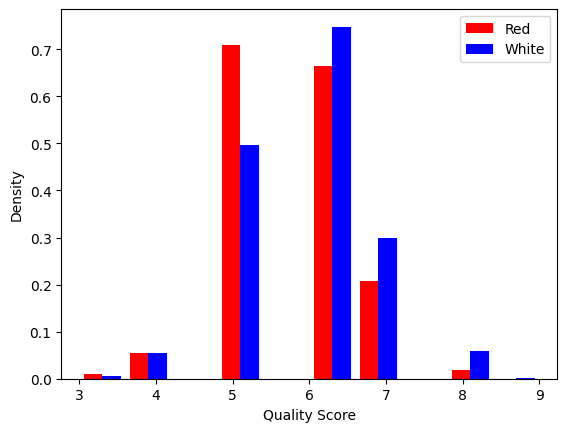

In [37]:
# Plot distribution of quality by wine type# Plot distribution of quality by wine type
plt.hist([red_wine_quality['quality'], white_wine_quality['quality']], label=['Red', 'White'], density=True, color=['red', 'blue'])
plt.xlabel('Quality Score')
plt.ylabel('Density')
plt.legend(loc='upper right')
plt.savefig('../data/wine_quality/quality_distribution_plot.png')
plt.show()



In the correlation heatmap, we can observe the relationships between the various chemical properties that are included in the data and the quality of white and red wines. Positive correlations are represented by lighter and darker shades of red, while negative correlations are shown in shades of blue. For example the density and the alcohol level have a rather high negativ correlation and the volatile acidity and the wine type have a rather high positiv correlation. If we only consider the quality of each wine, the highest positiv correlation can be observed with the alcohol component.

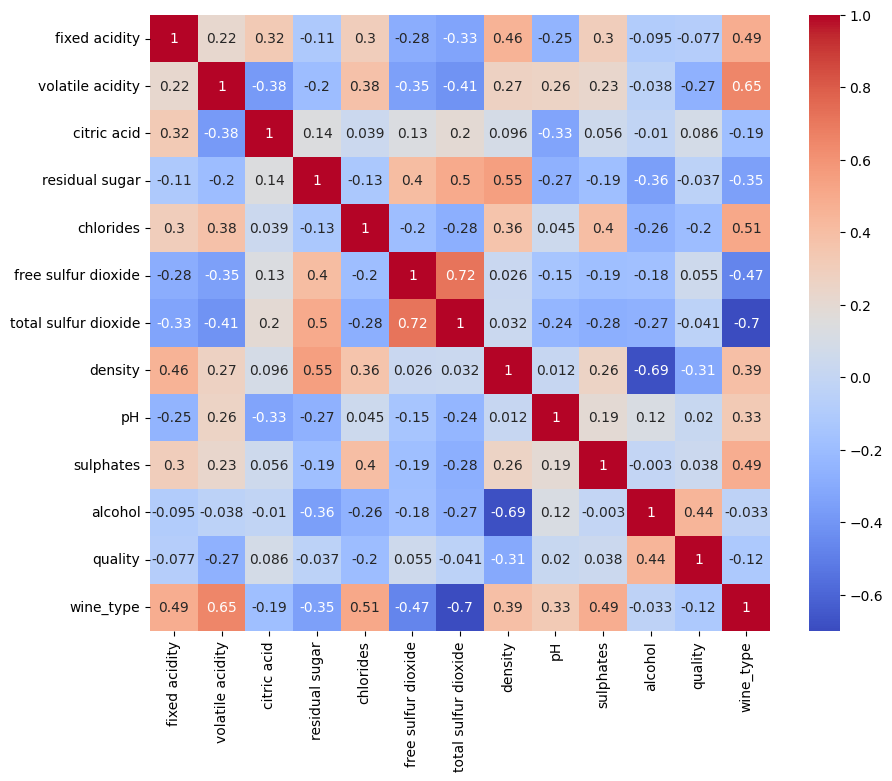

In [8]:
# Correlation Matrix between all different attributes
corr_matrix = combined_wine_quality.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.savefig('../data/wine_quality/quality_corr_matrix.png')
plt.show()

To go into a deeper analysis of the relationship between the alcohol content and the quality of each wine, box plots can help to visualize the distribution of this relationship. Although very low rated wines can have the same alcohol content as medium rated ones, the highest rated wines clearly have the highest alcohol content.

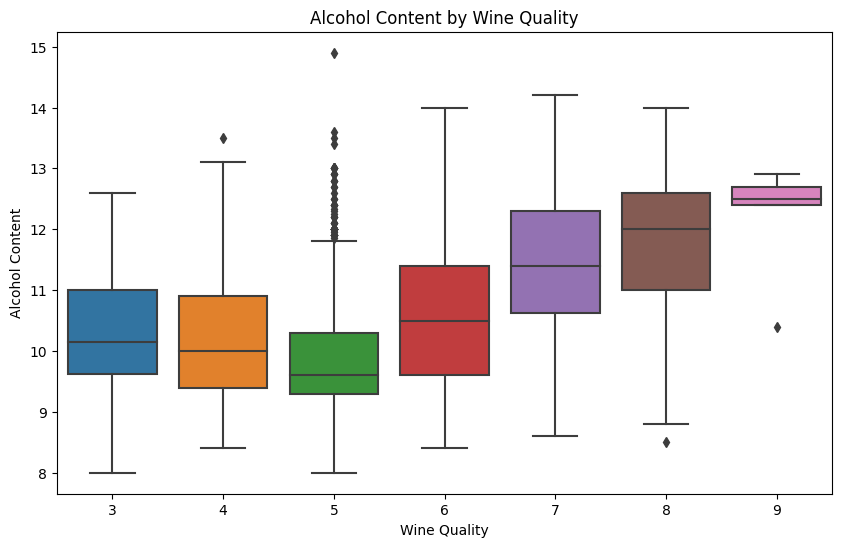

In [9]:
# Box Plots to further visualize the highest correlated relationship
plt.figure(figsize=(10, 6))
sns.boxplot(x='quality', y='alcohol', data=combined_wine_quality)
plt.xlabel('Wine Quality')
plt.ylabel('Alcohol Content')
plt.title('Alcohol Content by Wine Quality')
plt.savefig('../data/wine_quality/BoxPlot_Alcohol_by_Quality.png')
plt.show()